## Games and Students

## 1.- Dataset

The dataset provides valuable insights into the demographics and gaming habits of students, capturing various attributes that could be analyzed to uncover meaningful correlations. Each entry in the dataset includes the student's gender, identified as either "Female" or "Male," along with a unique school code that serves as an identifier for each institution. This allows for the categorization and grouping of students based on their respective schools, enabling comparative analyses across different educational institutions.

One of the key aspects covered in the dataset is the student's gaming experience, which includes the number of years they have been playing games. This attribute can indicate whether gaming is a long-term habit or a relatively new activity for the student. Additionally, the dataset records how frequently students engage in gaming, likely measured on a scale from 1 to 5, providing a quantitative representation of their gaming intensity. To further elaborate on gaming engagement, the dataset also tracks the average number of hours a student spends playing games daily. This metric can be crucial in understanding whether extended gaming sessions have an impact on academic performance. Moreover, the dataset distinguishes whether a student actively plays games or not, which can be particularly useful in comparative studies assessing the behaviors of gaming versus non-gaming students

Beyond gaming habits, the dataset delves into socioeconomic factors by including the annual income of the student's family. This "Parent Revenue" variable can help researchers examine the potential influence of economic background on a student's gaming behavior and academic performance. Additionally, the education levels of both the student's father and mother are recorded, offering insights into whether parental education has any correlation with the student's gaming frequency, academic performance, or gaming choices.

Academic performance is another critical component of this dataset, represented by the "Grade" variable, which provides a measure of the student's academic standing. This information can be instrumental in investigating how gaming habits, parental background, and socioeconomic status contribute to or hinder academic success.

This dataset can be found in [Games and Students](https://www.kaggle.com/datasets/willianoliveiragibin/games-and-students)

**The purpose of this notebook is doing a exploratory analysis of the dataset and try to make conclussions with it.**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import kagglehub
from kagglehub import KaggleDatasetAdapter

Dataset

In [2]:

file_path = "gameandgrade new.csv"


df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "willianoliveiragibin/games-and-students",
  file_path
)

In [3]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
0,0,1,1,2,1,1,4,4,5,77.50,"7750,00%"
1,1,1,1,3,1,1,1,3,3,83.00,"8300,00%"
2,0,1,0,0,0,0,1,3,3,80.00,"8000,00%"
3,0,1,3,5,1,1,2,2,3,45.00,"4500,00%"
4,1,1,1,1,2,1,1,3,4,85.00,"8500,00%"


Null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
 10  percentage        770 non-null    object
dtypes: int64(9), object(2)
memory usage: 66.3+ KB


We need variable "Grade" in type float

In [5]:
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               770 non-null    int64  
 1   School Code       770 non-null    int64  
 2   Playing Years     770 non-null    int64  
 3   Playing Often     770 non-null    int64  
 4   Playing Hours     770 non-null    int64  
 5   Playing Games     770 non-null    int64  
 6   Parent Revenue    770 non-null    int64  
 7   Father Education  770 non-null    int64  
 8   Mother Education  770 non-null    int64  
 9   Grade             769 non-null    float64
 10  percentage        770 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 66.3+ KB


## 2.-Exploratory analysis

## 2.1.- Analysis of each variable individually

Categorical variables visualization

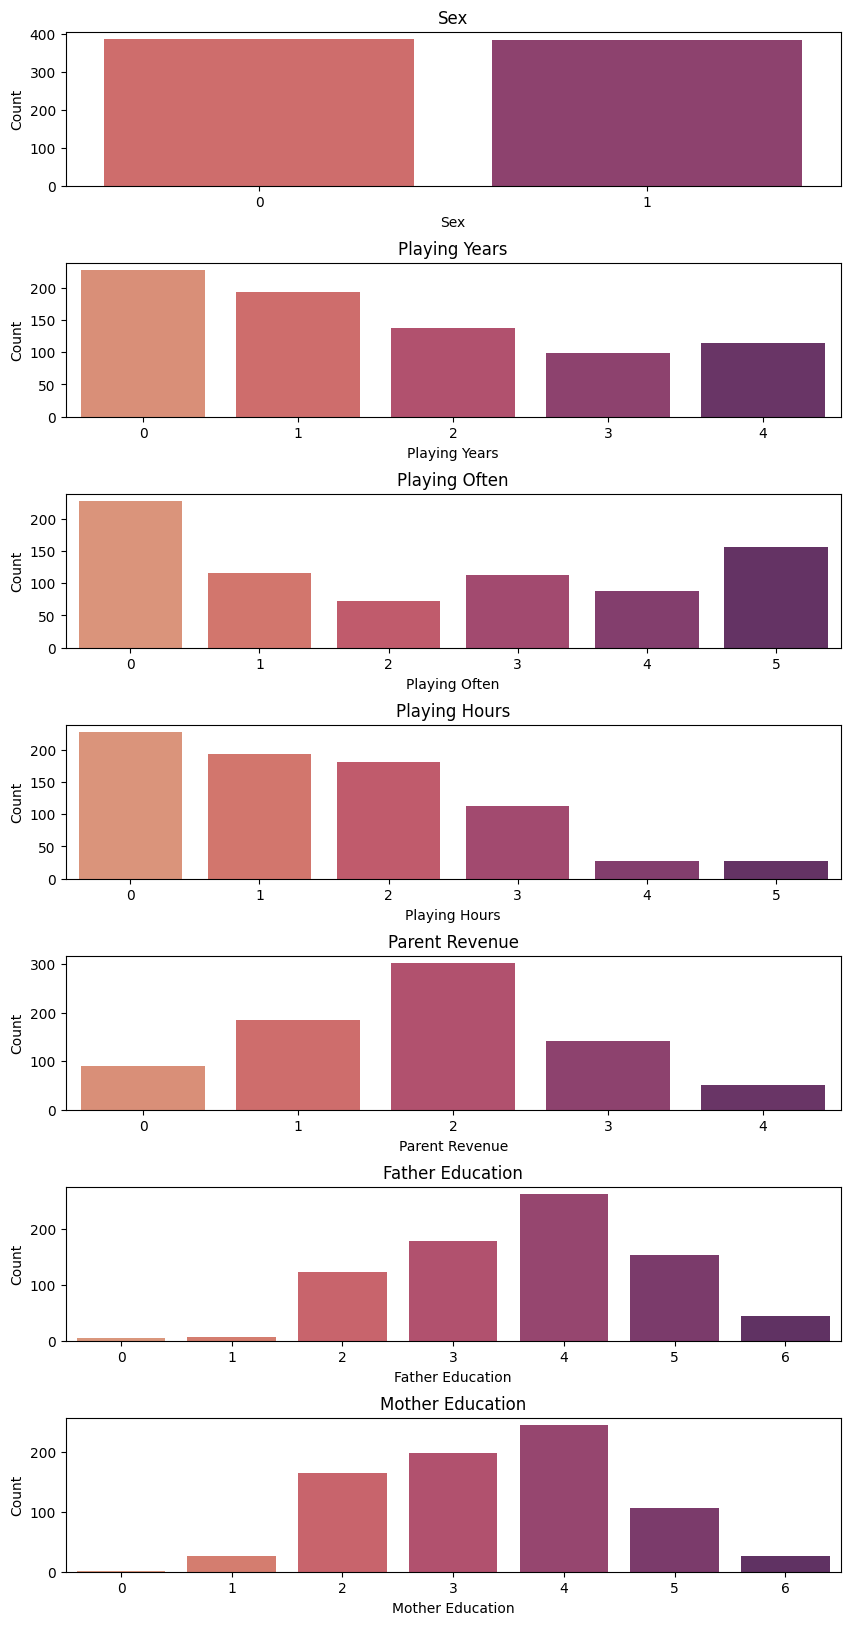

In [7]:
var_of_interest = ["Sex", "Playing Years", "Playing Often", "Playing Hours", "Parent Revenue", "Father Education", "Mother Education"]

fig, ax = plt.subplots(len(var_of_interest), 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(var_of_interest):
    sns.countplot(data=df, x=var, ax=ax[i], palette="flare")
    ax[i].set_title(f"{var}")
    ax[i].set_xlabel(var)
    ax[i].set_ylabel("Count")

We can see that we have a lot of data of new players if we see the variable "Playing Years" also we don't have many people that play for more than 3 hours, if we see the data about Parents Educations and Parents revenue, we can see a shape like a normal distribution.

In [8]:
df.drop(columns=["School Code", "Playing Games", "percentage"], inplace=True)
df.columns

Index(['Sex', 'Playing Years', 'Playing Often', 'Playing Hours',
       'Parent Revenue', 'Father Education', 'Mother Education', 'Grade'],
      dtype='object')

In [9]:
df.describe()

,Sex,Playing Years,Playing Often,Playing Hours,Parent Revenue,Father Education,Mother Education,Grade
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,769.000000
mean,0.498701,1.584416,2.242857,1.488312,1.837662,3.718182,3.410390,77.500039
std,0.500323,1.407306,1.923635,1.337853,1.064077,1.171756,1.176447,16.513588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.250000,65.000000
50%,0.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,80.000000
75%,1.000000,3.000000,4.000000,2.000000,2.000000,5.000000,4.000000,90.000000
max,1.000000,4.000000,5.000000,5.000000,4.000000,6.000000,6.000000,100.000000


Veamos el histograma de la variable "Grade"

Text(0.5, 1.0, 'Grade Distribution')

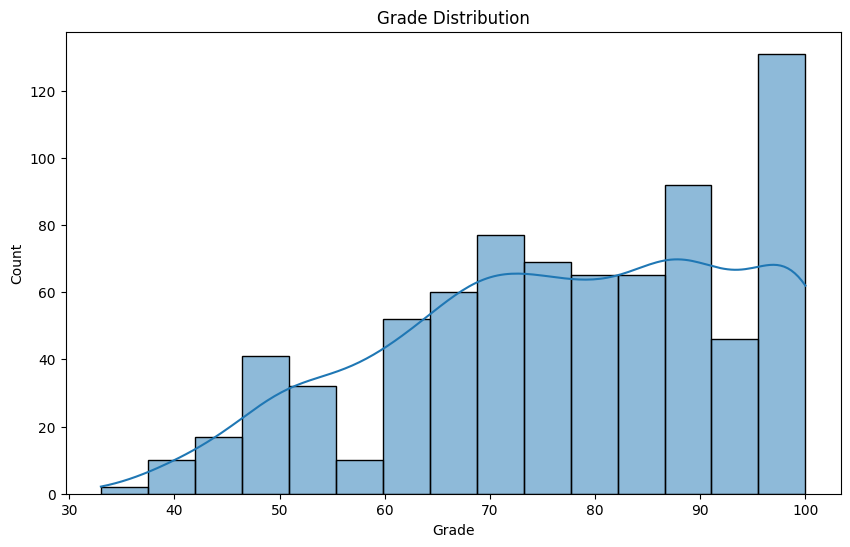

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df["Grade"], bins=15, kde=True)
ax.set_title("Grade Distribution")

In [11]:
df["Grade"].describe()

,Grade
count,769.000000
mean,77.500039
std,16.513588
min,33.000000
25%,65.000000
50%,80.000000
75%,90.000000
max,100.000000


We can see that below 75% of data, students have a grade of 90
Also we can see a right bias,

## 2.2.- Univariate analysis

Text(0.5, 1.0, 'Grade Distribution')

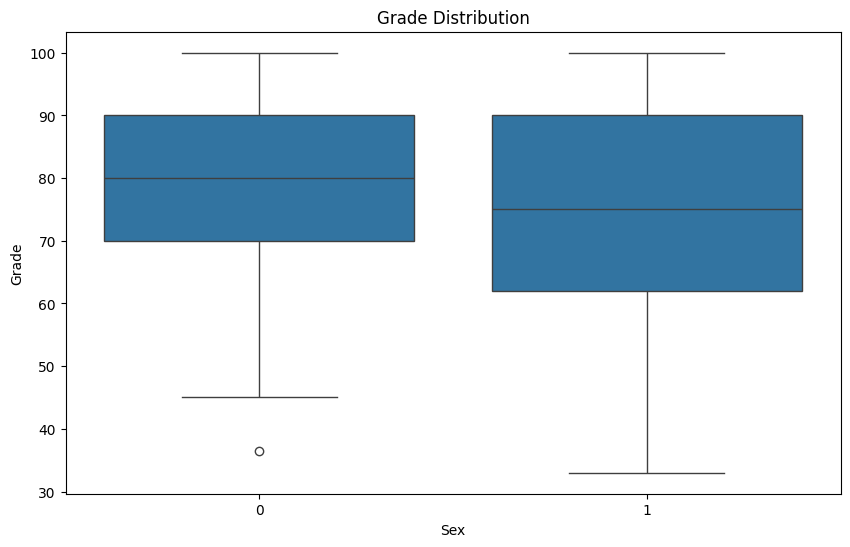

In [12]:
#Grade vs Sex
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df["Sex"], y = df["Grade"])
ax.set_title("Grade Distribution")

**There is no significant difference**

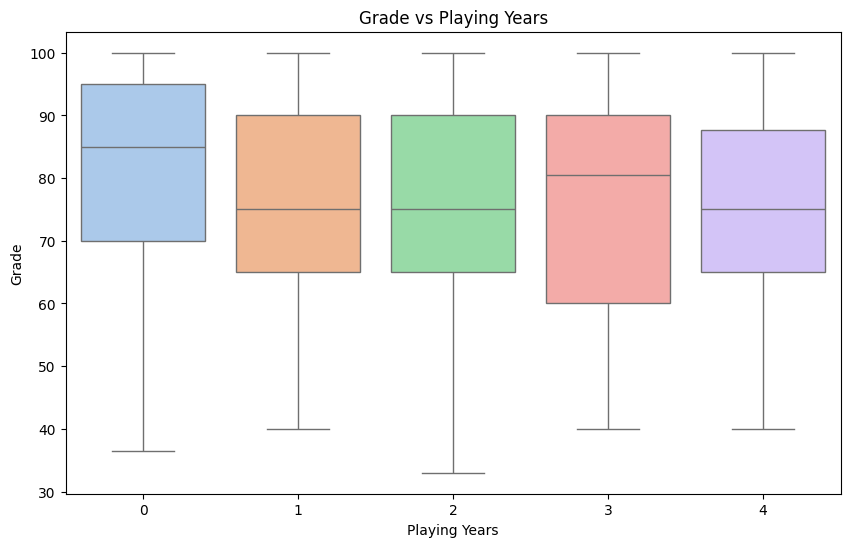

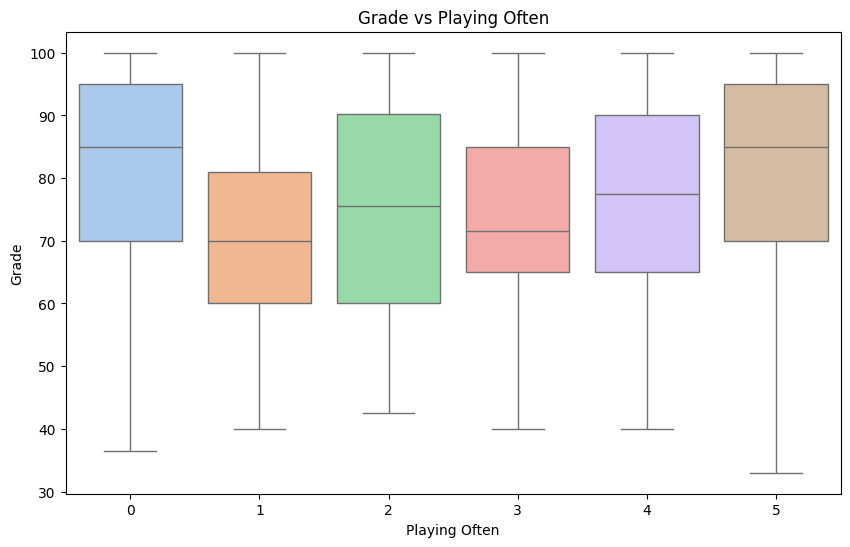

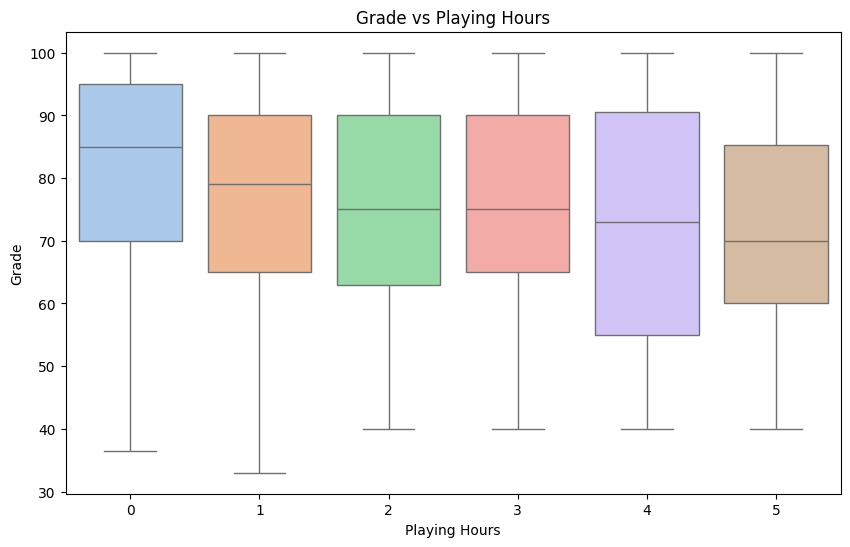

In [13]:
#Grade vs Playing Years,	Playing Often,	Playing Hours

play_var = ["Playing Years", "Playing Often", "Playing Hours"]
for i, var in enumerate(play_var):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x=df[var], y = df["Grade"], palette="pastel")
    ax.set_title(f"Grade vs {var}")

There is no significant difference in variables "Playing Years" and "Playing Often", but in "Playing Hours" we can see a tendency for grades to decrease.

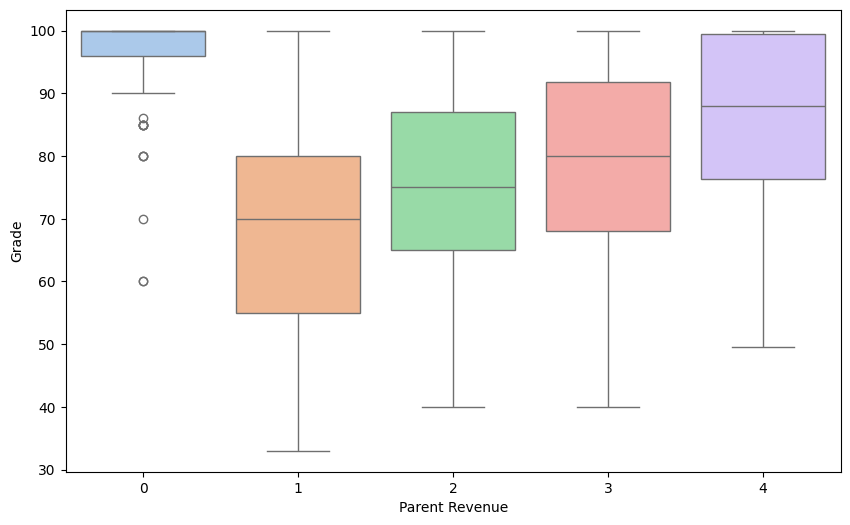

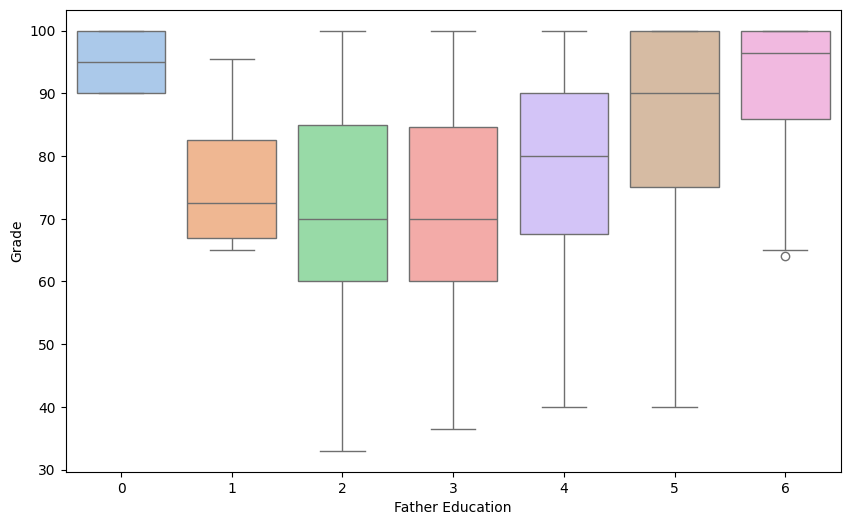

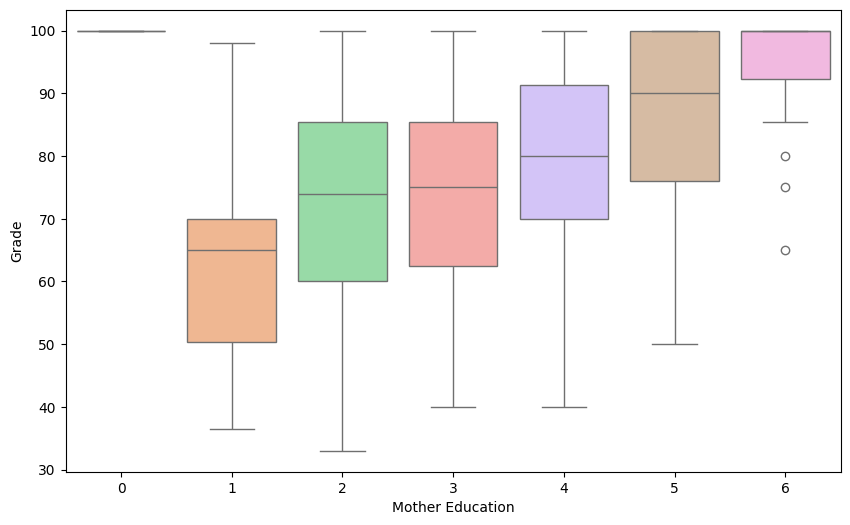

In [14]:
#Grade vs Parents information
parents_var = ["Parent Revenue", "Father Education", "Mother Education"]
for i, var in enumerate(parents_var):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x=df[var], y = df["Grade"], palette="pastel")

All of this graphics have a similar shape, we might think that they are equally related to the grades

In [15]:
def tasas(x,y, type="line", palette="pastel"):
  tasa = df.groupby(x)[y].mean().rename("mean_conv").reset_index()

  if type == "line":
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(data=tasa, x=x, y="mean_conv", palette=palette)
    plt.grid()
  elif type == "bar":
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(data=tasa, x=x, y="mean_conv", palette=palette)
    plt.grid()
  elif type == "scatter":
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=tasa, x=x, y="mean_conv", palette=palette)
    plt.grid()

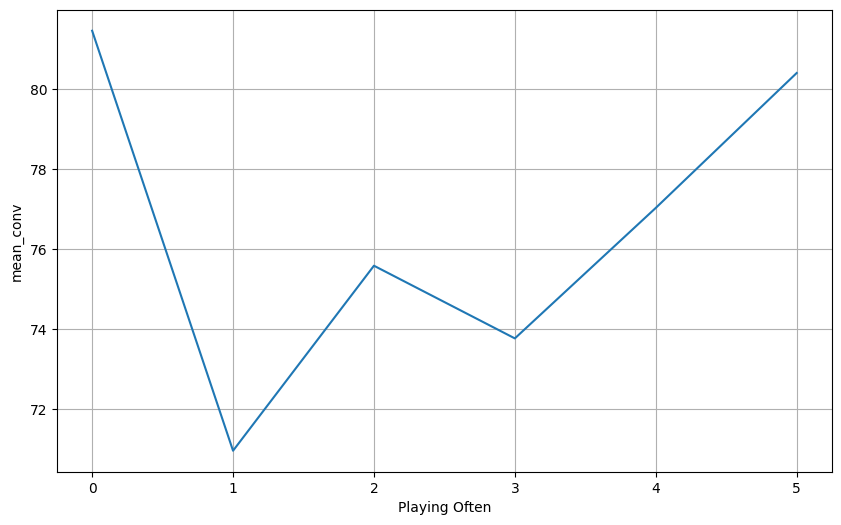

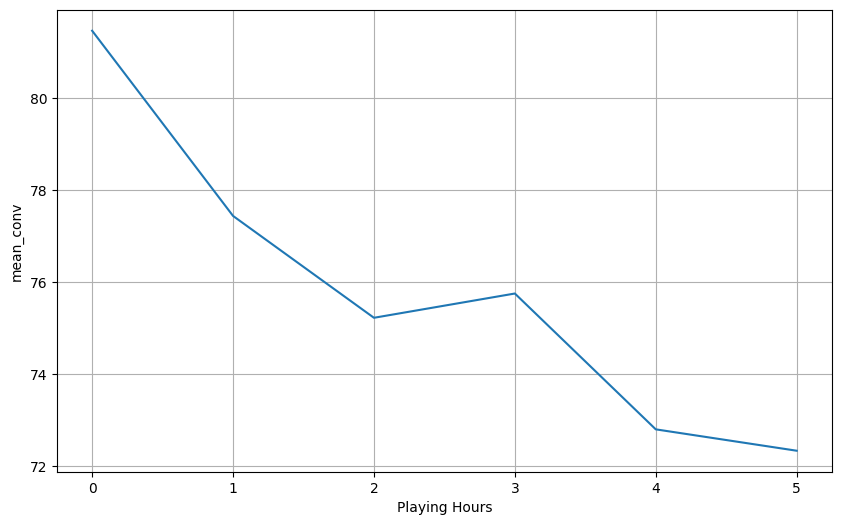

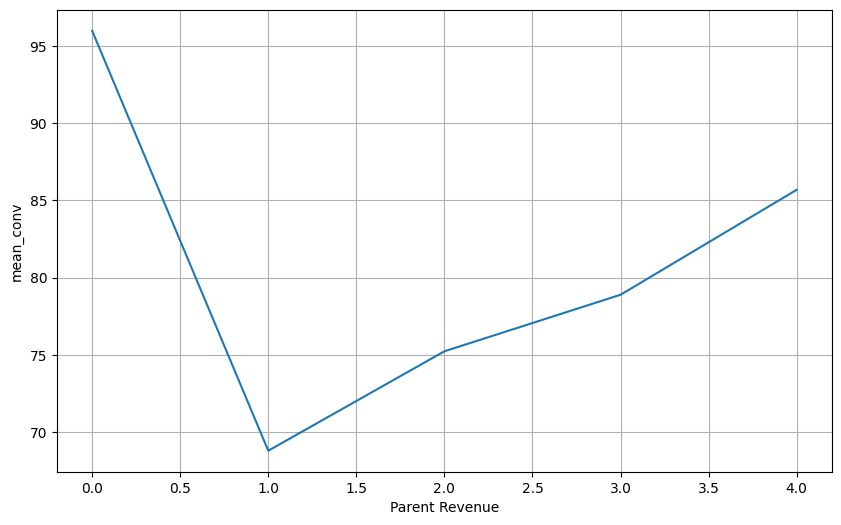

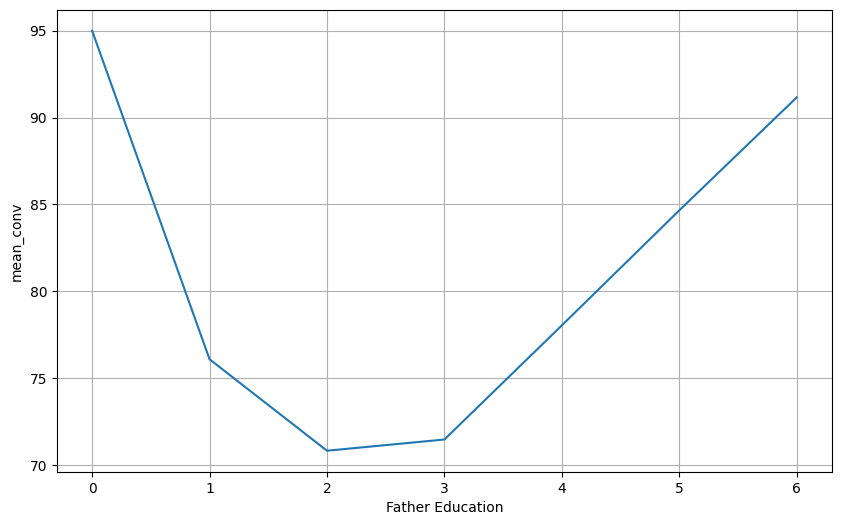

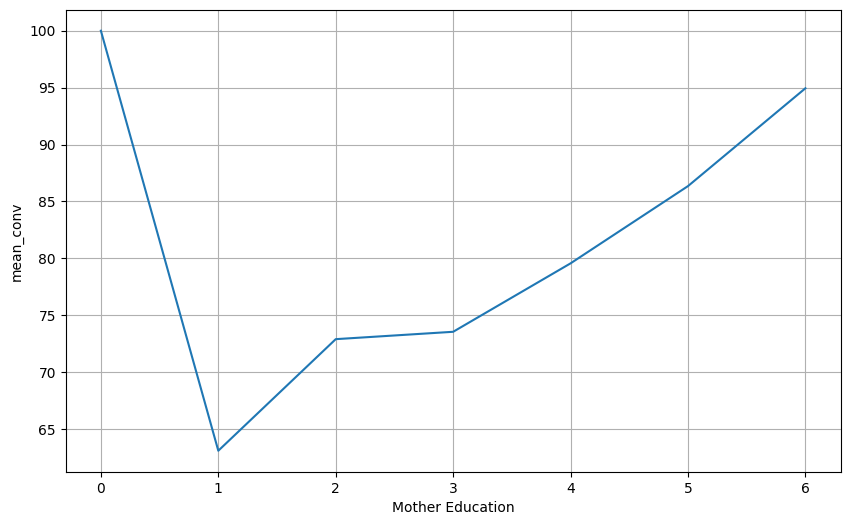

In [16]:
new_var = ["Playing Often", "Playing Hours", "Parent Revenue", "Father Education", "Mother Education"]
for i, var in enumerate(new_var):
  tasas(var, "Grade")

We can see that between level 1 - 3 in parents information, there is a significant decrease in grade's mean

In playing hours there is a inversely linear relationship with grade's mean

In [17]:
df.loc[:, "Group by father education"] = "0"
df.loc[(df["Father Education"] >= 1) & (df["Father Education"] < 4), "Group by father education"] = "1-3"
df.loc[df["Father Education"] >= 4, "Group by father education"] = "4+"

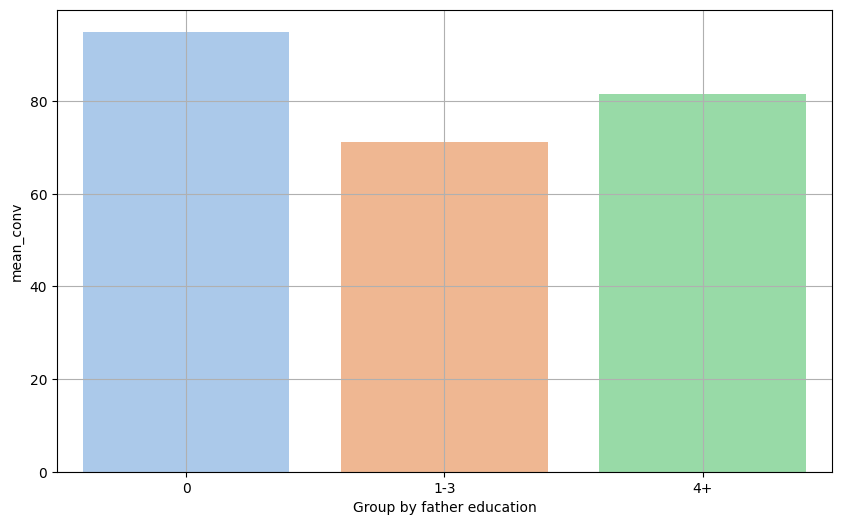

In [18]:
tasas("Group by father education", "Grade", type="bar")

We can see that the second group has a some problems with their grades, something similar if we analize the Mother education

In [19]:
df.loc[:, "Group by parents revenue"] = "0"
df.loc[(df["Parent Revenue"] >= 1) & (df["Parent Revenue"] < 4), "Group by parents revenue"] = "1-3"
df.loc[df["Parent Revenue"] >= 4, "Group by parents revenue"] = "4+"

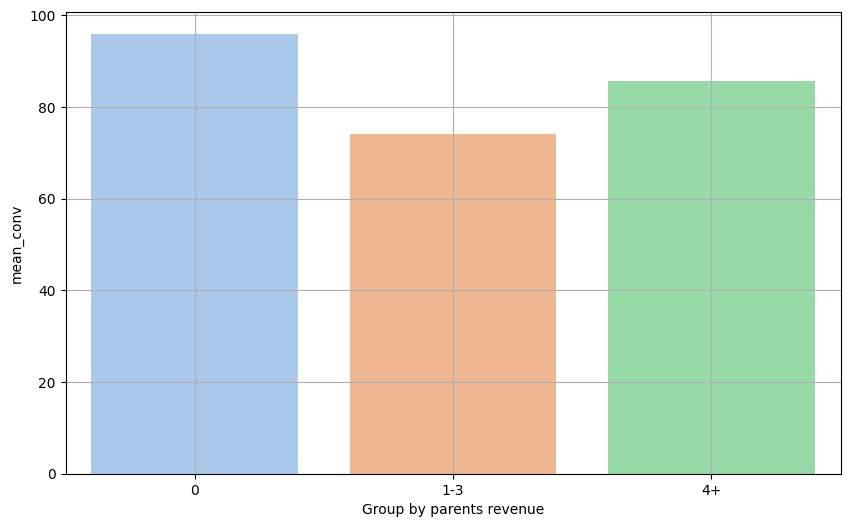

In [20]:
tasas("Group by parents revenue", "Grade", type="bar")

We can see that the second group has a some problems with their grades

In [21]:
df.loc[:, "Group by Playing Hours"] = "0"
df.loc[(df["Playing Hours"] >= 1) & (df["Playing Hours"] < 4), "Group by Playing Hours"] = "1-3"
df.loc[df["Playing Hours"] >= 4, "Group by Playing Hours"] = "4+"

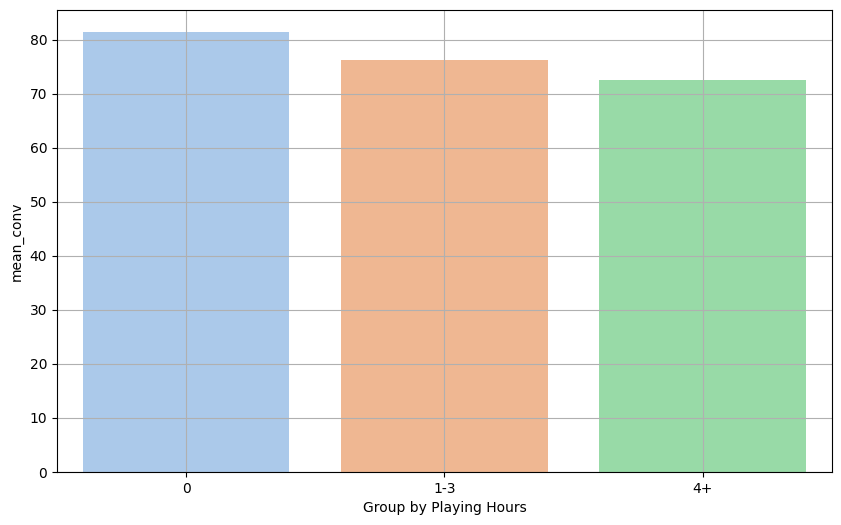

In [22]:
tasas("Group by Playing Hours", "Grade", type="bar")

A linear decreasing, but this was viewed before.

## Bivariate analysis

Some variables of interest are Playing Hours, Parents revenue and Father education, we will try to analize together.

In [26]:
def graph_biv(col_list, y, reverse = False):
  if reverse:
    col_list = col_list[::-1]

  if len(col_list) != 2:
    print("La lista debe tener exactamente dos columnas")
    return

  tasa = df.groupby(col_list)[y].mean().rename("mean_conv").reset_index()
  tasa["mean_conv"] = tasa["mean_conv"].round(0)

  fig, ax = plt.subplots(figsize=(10, 8))
  sns.pointplot(data=tasa, x="mean_conv", y=col_list[0], hue=col_list[1], dodge=True, linestyle="None", join=False, errorbar=None)
  ax.set_title(f"Grade vs {col_list[0]} and {col_list[1]}")
  plt.xticks(rotation=45)
  plt.grid()



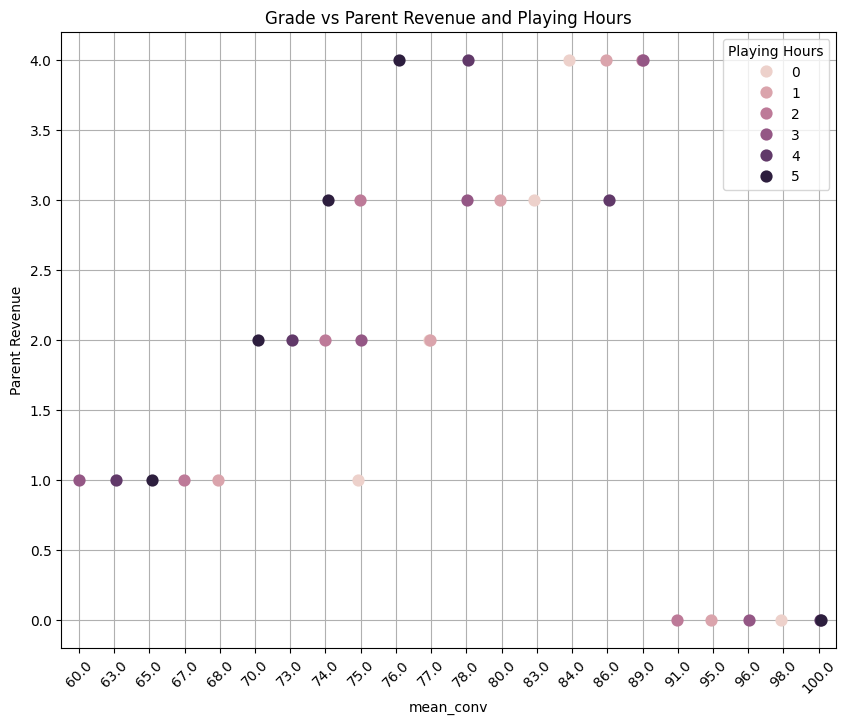

In [30]:
graph_biv(["Playing Hours", "Parent Revenue"], "Grade", reverse=True)

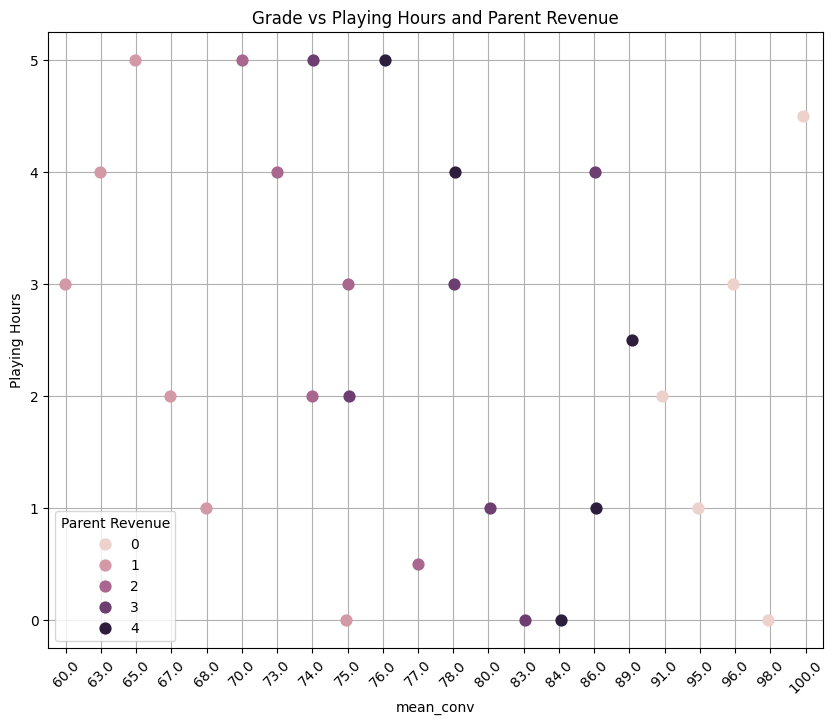

In [31]:
graph_biv(["Playing Hours", "Parent Revenue"], "Grade")

We can see in the first graph that if the parent's revenue is higher, the students with the worse grades are those that has more playing hours, probably because they have more videogames that their parents can buy; other thing that we can see in both graphs is that students with best grades are those that their parents has a higher revenue and also those with the worst reveneu, the first group probably because they have a lifestyle suitable for their study, and the second group probably because they have some kind of scholarship for good grades, so they have to take care a lot for it, also I think that students with parents with low revenue has a mental boost for do their best.

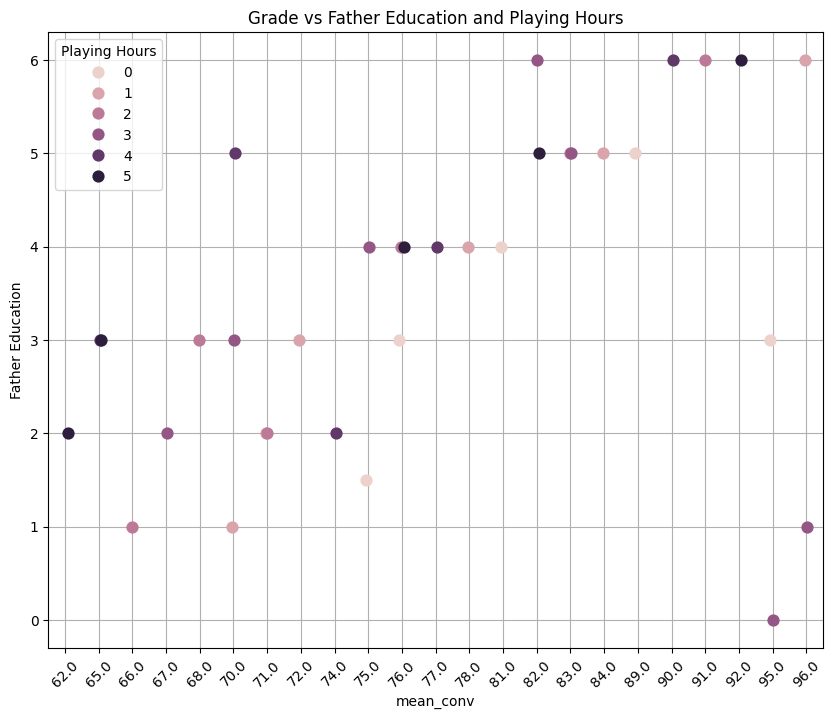

In [32]:
graph_biv(["Playing Hours", "Father Education"], "Grade", reverse=True)

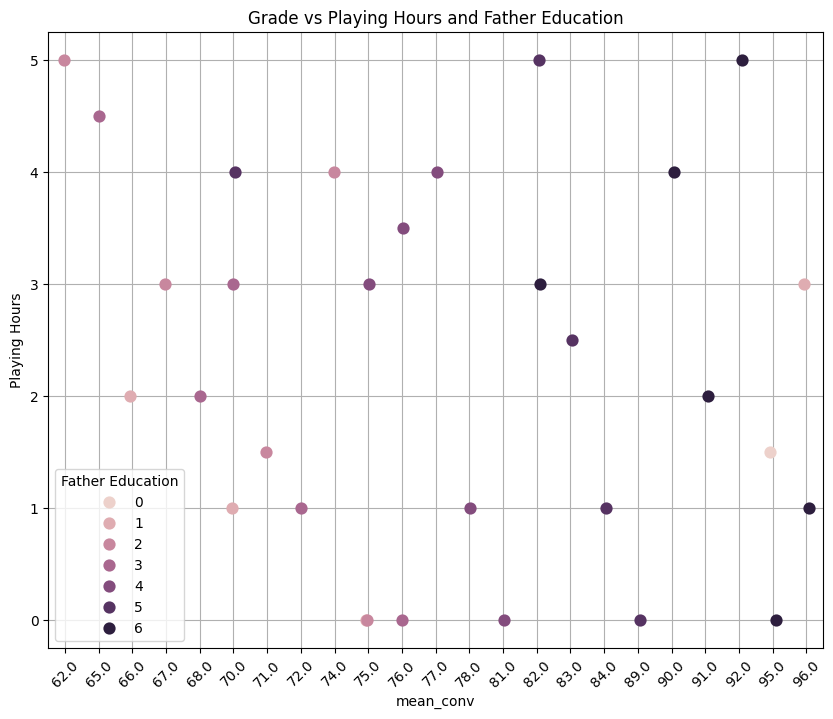

In [33]:
graph_biv(["Playing Hours", "Father Education"], "Grade")

Something similar, if the parents had a high education, students will have better grades, probably because the parents are an inspiration for students, but, we can see that those with high playing hours, are those with worse grades again.

## Conclusions



*   It looks that more playing hours has a bad repercussion in grades.
*   Students with parents with very high or very low revenue has good grades, those who belong to the middle class has more difficults to get high grades.
*   Students with more playing hours has the worst grades in comparisson with students with the same parents revenue, however a student with the highest playing hours in the highest level of parents revenue, has better grades than students with low playing hours but middle parents revenue.

We can see that videogames has an impact on academic performance if the student spend a lot of hours in it, but, the principal factor for bad grades are socioeconomic conditions socioeconomic conditions related to parents' revenue.



